In [19]:
import json
import re
import functools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

In [2]:
METRICS = [f'test_rouge_{i}_f1' for i in ['1', '2', '3', 'L']]

In [3]:
def load_csv(csv_path):
    df = pd.read_csv(csv_path)
    df = df.drop([col for col in df.columns if '_step' in col], axis=1) # drop training step number columns
    df = df.replace('undefined', 0.0)
    df = df.astype('float64')
    
    return df

df = load_csv('../reports/thesis/tables/top_10_test_rouge_L_f1.csv')
df.head()

,epoch,rs_1_09 - test_rouge_L_f1,rs_1_08 - test_rouge_L_f1,rs_1_13 - test_rouge_L_f1,rs_1_12 - test_rouge_L_f1,rs_1_11 - test_rouge_L_f1,rs_1_10 - test_rouge_L_f1,rs_1_07 - test_rouge_L_f1,rs_1_06 - test_rouge_L_f1,rs_1_05 - test_rouge_L_f1,rs_1_04 - test_rouge_L_f1
0,1.0,0.248835,0.239378,0.424240,0.164319,0.478707,0.396162,0.192241,0.411260,0.177816,0.310966
1,2.0,0.298319,0.374998,0.486871,0.186104,0.523838,0.503040,0.254408,0.451513,0.219013,0.427984
2,3.0,0.318446,0.474979,0.510211,0.205533,0.513825,0.535803,0.306846,0.463835,0.264076,0.462468
3,4.0,0.324207,0.504834,0.521742,0.217778,0.522579,0.552802,0.353147,0.470170,0.316740,0.481373
4,5.0,0.263045,0.517479,0.497633,0.233040,0.534139,0.562303,0.000000,0.470495,0.358042,0.489854


In [4]:
def load_scores(metrics=METRICS):
    dfs = [load_csv(f'../reports/thesis/tables/top_10_{metric}.csv').set_index('epoch') for metric in metrics]
    return functools.reduce(lambda a, b: a.join(b), dfs).reset_index() # join by epoch

df = load_scores()
df.head()

,epoch,rs_1_09 - test_rouge_1_f1,rs_1_08 - test_rouge_1_f1,rs_1_13 - test_rouge_1_f1,rs_1_12 - test_rouge_1_f1,rs_1_11 - test_rouge_1_f1,rs_1_10 - test_rouge_1_f1,rs_1_07 - test_rouge_1_f1,rs_1_06 - test_rouge_1_f1,rs_1_05 - test_rouge_1_f1,...,rs_1_09 - test_rouge_L_f1,rs_1_08 - test_rouge_L_f1,rs_1_13 - test_rouge_L_f1,rs_1_12 - test_rouge_L_f1,rs_1_11 - test_rouge_L_f1,rs_1_10 - test_rouge_L_f1,rs_1_07 - test_rouge_L_f1,rs_1_06 - test_rouge_L_f1,rs_1_05 - test_rouge_L_f1,rs_1_04 - test_rouge_L_f1
0,1.0,0.248921,0.239581,0.425084,0.164421,0.480249,0.396820,0.192362,0.412132,0.177957,...,0.248835,0.239378,0.424240,0.164319,0.478707,0.396162,0.192241,0.411260,0.177816,0.310966
1,2.0,0.298475,0.375682,0.488154,0.186155,0.525758,0.504121,0.254676,0.452723,0.219332,...,0.298319,0.374998,0.486871,0.186104,0.523838,0.503040,0.254408,0.451513,0.219013,0.427984
2,3.0,0.318584,0.475769,0.511541,0.205622,0.515664,0.536907,0.307376,0.465106,0.264635,...,0.318446,0.474979,0.510211,0.205533,0.513825,0.535803,0.306846,0.463835,0.264076,0.462468
3,4.0,0.324345,0.505747,0.523124,0.217888,0.524404,0.553961,0.353846,0.471538,0.317654,...,0.324207,0.504834,0.521742,0.217778,0.522579,0.552802,0.353147,0.470170,0.316740,0.481373
4,5.0,0.263235,0.518402,0.499089,0.233216,0.536052,0.563370,0.000000,0.471882,0.359272,...,0.263045,0.517479,0.497633,0.233040,0.534139,0.562303,0.000000,0.470495,0.358042,0.489854


In [5]:
def to_experiment_id(wandb_key):
    id = int(re.search(f'rs_1_(.*) - .*', wandb_key, re.IGNORECASE).group(1))
    return f'experiment_{id}'

to_experiment_id('rs_1_10 - test_rouge_2_f1')

'experiment_10'

In [6]:
def get_best_score(df, key, metric_name):
    best_row = df.loc[df[key].idxmax()][['epoch', key]]
    return pd.DataFrame(data={'experiment_id': [to_experiment_id(key)], 'epoch': [best_row['epoch']], metric_name: [best_row[key]]})

get_best_score(df, 'rs_1_10 - test_rouge_L_f1', 'test_rouge_L_f1')

,experiment_id,epoch,test_rouge_L_f1
0,experiment_10,10.0,0.58293


In [7]:
def get_score_at_epoch(df, epoch, key, metric_name):
    score = df[df['epoch'] == epoch][key].values[0]
    return pd.DataFrame(data={'experiment_id': [to_experiment_id(key)], metric_name: [score]})

get_score_at_epoch(df, 10, 'rs_1_10 - test_rouge_2_f1', 'test_rouge_2_f1')

,experiment_id,test_rouge_2_f1
0,experiment_10,0.336869


In [8]:
def get_best_scores(df, metric='test_rouge_L_f1'):
    return pd.concat([
        get_best_score(df, column, metric_name=metric)
        for column in df.columns
        if metric in column
    ]).sort_values(by=metric, ascending=False).set_index('experiment_id').astype({'epoch': 'int64'})

df_scores = get_best_scores(df)
df_scores

,epoch,test_rouge_L_f1
experiment_id,,
experiment_10,10,0.582930
experiment_8,32,0.568416
experiment_5,40,0.565396
experiment_11,11,0.560674
experiment_13,21,0.555791
experiment_4,32,0.529455
experiment_6,6,0.476592
experiment_12,35,0.453604
experiment_7,4,0.353147


In [9]:
def get_scores_at_epochs(df, df_pinned_epochs, metric='test_rouge_3_f1'):
    scores = []
    for column in df.columns:
        if metric in column:
            experiment_id = to_experiment_id(column)
            
            filtered_epoch = df_pinned_epochs[df_pinned_epochs['experiment_id'] == experiment_id]['epoch'].values
            if len(filtered_epoch) < 1: # cannot find experiment for some reason
                print(f'Cannot find experiment: {experiment_id}')
                scores.append([experiment_id, float('NaN')])
            else:
                epoch = filtered_epoch[0]
                score = df[df['epoch'] == epoch][column].values[0]
                scores.append([experiment_id, score])
    return pd.DataFrame(scores).rename(columns={0: 'experiment_id', 1: metric})

get_scores_at_epochs(df, df_scores.reset_index()[['experiment_id', 'epoch']])

,experiment_id,test_rouge_3_f1
0,experiment_9,0.001012
1,experiment_8,0.154672
2,experiment_13,0.146122
3,experiment_12,0.067105
4,experiment_11,0.143500
5,experiment_10,0.164219
6,experiment_7,0.029268
7,experiment_6,0.102353
8,experiment_5,0.146122
9,experiment_4,0.133454


In [10]:
def load_best_scores(leading_metric='test_rouge_L_f1', remaining_metrics=METRICS[:3]):
    df = load_scores()
    df_leading_scores = get_best_scores(df, leading_metric)
    df_pinned_epochs = df_leading_scores.reset_index()[['experiment_id', 'epoch']]
    other_scores = [
        get_scores_at_epochs(df, df_pinned_epochs, metric)
        for metric in remaining_metrics
    ]
    return functools.reduce(lambda a, b: a.merge(b), [df_leading_scores.reset_index()] + other_scores).set_index('experiment_id')

In [11]:
df_all_scores = load_best_scores()
df_all_scores

,epoch,test_rouge_L_f1,test_rouge_1_f1,test_rouge_2_f1,test_rouge_3_f1
experiment_id,,,,,
experiment_10,10,0.582930,0.583996,0.336869,0.164219
experiment_8,32,0.568416,0.569363,0.324100,0.154672
experiment_5,40,0.565396,0.567169,0.319559,0.146122
experiment_11,11,0.560674,0.562520,0.310698,0.143500
experiment_13,21,0.555791,0.557455,0.309949,0.146122
experiment_4,32,0.529455,0.531005,0.289622,0.133454
experiment_6,6,0.476592,0.478074,0.240137,0.102353
experiment_12,35,0.453604,0.455126,0.201316,0.067105
experiment_7,4,0.353147,0.353846,0.122582,0.029268


In [12]:
df_experiment_params = pd.read_json('../experiments/random_search_1.json').transpose()
df_experiment_params

,batch_size,dropout_rate,embedding_dim,latent_dim,learning_rate,max_input_seq_length,max_output_seq_length,vocabulary_size
experiment_0,512.0,0.118569,32.0,640.0,0.000192,75.0,8.0,7000.0
experiment_1,128.0,0.087517,128.0,256.0,0.000118,100.0,6.0,2000.0
experiment_2,64.0,0.185119,112.0,256.0,0.006695,125.0,5.0,5000.0
experiment_3,1024.0,0.155631,32.0,512.0,0.001129,75.0,8.0,7000.0
experiment_4,256.0,0.135776,32.0,384.0,0.005168,50.0,8.0,4000.0
experiment_5,512.0,0.094720,128.0,640.0,0.000336,150.0,7.0,2000.0
experiment_6,32.0,0.064828,112.0,1024.0,0.003592,75.0,8.0,6000.0
experiment_7,64.0,0.089990,32.0,384.0,0.000402,75.0,6.0,5000.0
experiment_8,256.0,0.042077,80.0,256.0,0.002340,175.0,5.0,3000.0
experiment_9,128.0,0.087720,96.0,1024.0,0.006250,150.0,8.0,6000.0


In [13]:
df_experiment_params.join(df_all_scores)

,batch_size,dropout_rate,embedding_dim,latent_dim,learning_rate,max_input_seq_length,max_output_seq_length,vocabulary_size,epoch,test_rouge_L_f1,test_rouge_1_f1,test_rouge_2_f1,test_rouge_3_f1
experiment_0,512.0,0.118569,32.0,640.0,0.000192,75.0,8.0,7000.0,NaN,NaN,NaN,NaN,NaN
experiment_1,128.0,0.087517,128.0,256.0,0.000118,100.0,6.0,2000.0,NaN,NaN,NaN,NaN,NaN
experiment_2,64.0,0.185119,112.0,256.0,0.006695,125.0,5.0,5000.0,NaN,NaN,NaN,NaN,NaN
experiment_3,1024.0,0.155631,32.0,512.0,0.001129,75.0,8.0,7000.0,NaN,NaN,NaN,NaN,NaN
experiment_4,256.0,0.135776,32.0,384.0,0.005168,50.0,8.0,4000.0,32.0,0.529455,0.531005,0.289622,0.133454
experiment_5,512.0,0.094720,128.0,640.0,0.000336,150.0,7.0,2000.0,40.0,0.565396,0.567169,0.319559,0.146122
experiment_6,32.0,0.064828,112.0,1024.0,0.003592,75.0,8.0,6000.0,6.0,0.476592,0.478074,0.240137,0.102353
experiment_7,64.0,0.089990,32.0,384.0,0.000402,75.0,6.0,5000.0,4.0,0.353147,0.353846,0.122582,0.029268
experiment_8,256.0,0.042077,80.0,256.0,0.002340,175.0,5.0,3000.0,32.0,0.568416,0.569363,0.324100,0.154672
experiment_9,128.0,0.087720,96.0,1024.0,0.006250,150.0,8.0,6000.0,4.0,0.324207,0.324345,0.026683,0.001012


In [14]:
def combine_scores(dfs, sort_metric='test_rouge_L_f1'):
    df = functools.reduce(lambda a, b: a.join(b, how='inner'), dfs)
    df = df.dropna()
    df = df.sort_values(by=sort_metric, ascending=False)
    df = df.round(4)
    df = df.astype({ key: 'int' for key in ['batch_size', 'embedding_dim', 'latent_dim', 'vocabulary_size', 'epoch', 'max_input_seq_length', 'max_output_seq_length']})
    df = df.astype('str') # preserve integer and float type heterogenity in columns after transpose
    df = df.transpose()
    
    return df

df_combined = combine_scores([
    df_experiment_params,
    df_all_scores,
])
df_combined

,experiment_10,experiment_8,experiment_5,experiment_11,experiment_13,experiment_4,experiment_6,experiment_12,experiment_7,experiment_9
batch_size,512,256,512,32,32,256,32,64,64,128
dropout_rate,0.1164,0.0421,0.0947,0.0276,0.121,0.1358,0.0648,0.1676,0.09,0.0877
embedding_dim,128,80,128,48,48,32,112,64,32,96
latent_dim,768,256,640,640,256,384,1024,256,384,1024
learning_rate,0.0032,0.0023,0.0003,0.0018,0.0013,0.0052,0.0036,0.0001,0.0004,0.0062
max_input_seq_length,175,175,150,175,125,50,75,100,75,150
max_output_seq_length,6,5,7,7,7,8,8,7,6,8
vocabulary_size,7000,3000,2000,2000,5000,4000,6000,7000,5000,6000
epoch,10,32,40,11,21,32,6,35,4,4
test_rouge_L_f1,0.5829,0.5684,0.5654,0.5607,0.5558,0.5295,0.4766,0.4536,0.3531,0.3242


In [15]:
def pretty_format(df):
    df = df.rename(columns={ column: '#' + column.split('_')[1] for column in df.columns })
    df = df.rename(index={ key: key.replace('_', ' ').title() for key in df.index })
    
    return df

df_final = pretty_format(df_combined)
df_final

,#10,#8,#5,#11,#13,#4,#6,#12,#7,#9
Batch Size,512,256,512,32,32,256,32,64,64,128
Dropout Rate,0.1164,0.0421,0.0947,0.0276,0.121,0.1358,0.0648,0.1676,0.09,0.0877
Embedding Dim,128,80,128,48,48,32,112,64,32,96
Latent Dim,768,256,640,640,256,384,1024,256,384,1024
Learning Rate,0.0032,0.0023,0.0003,0.0018,0.0013,0.0052,0.0036,0.0001,0.0004,0.0062
Max Input Seq Length,175,175,150,175,125,50,75,100,75,150
Max Output Seq Length,6,5,7,7,7,8,8,7,6,8
Vocabulary Size,7000,3000,2000,2000,5000,4000,6000,7000,5000,6000
Epoch,10,32,40,11,21,32,6,35,4,4
Test Rouge L F1,0.5829,0.5684,0.5654,0.5607,0.5558,0.5295,0.4766,0.4536,0.3531,0.3242


In [16]:
df_final.to_csv('../reports/thesis/tables/experiments.csv')

In [25]:
df_plot = load_scores(metrics=['test_rouge_L_f1', 'rouge_L_f1']).replace(0, float('NaN'))
df_plot

,epoch,rs_1_09 - test_rouge_L_f1,rs_1_08 - test_rouge_L_f1,rs_1_13 - test_rouge_L_f1,rs_1_12 - test_rouge_L_f1,rs_1_11 - test_rouge_L_f1,rs_1_10 - test_rouge_L_f1,rs_1_07 - test_rouge_L_f1,rs_1_06 - test_rouge_L_f1,rs_1_05 - test_rouge_L_f1,...,rs_1_09 - rouge_L_f1,rs_1_08 - rouge_L_f1,rs_1_13 - rouge_L_f1,rs_1_12 - rouge_L_f1,rs_1_11 - rouge_L_f1,rs_1_10 - rouge_L_f1,rs_1_07 - rouge_L_f1,rs_1_06 - rouge_L_f1,rs_1_05 - rouge_L_f1,rs_1_04 - rouge_L_f1
0,1.0,0.248835,0.239378,0.424240,0.164319,0.478707,0.396162,0.192241,0.411260,0.177816,...,0.192446,0.170490,0.266798,0.114040,0.361912,0.223861,0.148618,0.310867,0.130170,0.191727
1,2.0,0.298319,0.374998,0.486871,0.186104,0.523838,0.503040,0.254408,0.451513,0.219013,...,0.272663,0.301983,0.451362,0.174185,0.505325,0.456757,0.219691,0.430226,0.196846,0.367196
2,3.0,0.318446,0.474979,0.510211,0.205533,0.513825,0.535803,0.306846,0.463835,0.264076,...,0.306002,0.435829,0.489528,0.192931,0.524985,0.524024,0.277451,0.455694,0.239994,0.430249
3,4.0,0.324207,0.504834,0.521742,0.217778,0.522579,0.552802,0.353147,0.470170,0.316740,...,0.317453,0.491411,0.506743,0.209431,0.530036,0.558908,0.326183,0.466406,0.288746,0.454632
4,5.0,0.263045,0.517479,0.497633,0.233040,0.534139,0.562303,NaN,0.470495,0.358042,...,0.279706,0.516481,0.506606,0.222646,0.544999,0.581753,NaN,0.472862,0.336245,0.468551
5,6.0,0.007356,0.527413,0.529069,0.248079,0.543311,0.570152,NaN,0.476592,0.392368,...,0.204134,0.532853,0.504934,0.237579,0.562012,0.597994,NaN,0.476043,0.375214,0.477879
6,7.0,0.007356,0.537004,0.533940,0.266376,0.550342,0.575860,NaN,0.475211,0.417035,...,0.007441,0.545173,0.524945,0.253478,0.567894,0.609583,NaN,0.478073,0.405943,0.484801
7,8.0,0.007356,0.541492,0.536047,0.281506,0.525071,0.579678,NaN,NaN,0.438236,...,0.007441,0.554402,0.530271,0.267581,0.574182,0.619116,NaN,NaN,0.430700,0.490583
8,9.0,NaN,0.543664,0.540945,0.294970,0.554285,0.581888,NaN,NaN,0.456084,...,NaN,0.561157,0.535049,NaN,0.571640,0.626346,NaN,NaN,0.452698,0.494345
9,10.0,NaN,0.547746,0.543523,0.305292,0.557785,0.582930,NaN,NaN,0.471551,...,NaN,0.567433,0.538219,0.293817,0.587698,0.632097,NaN,NaN,0.471358,0.498034


In [27]:
plt.rcParams['figure.figsize'] = (20, 12)

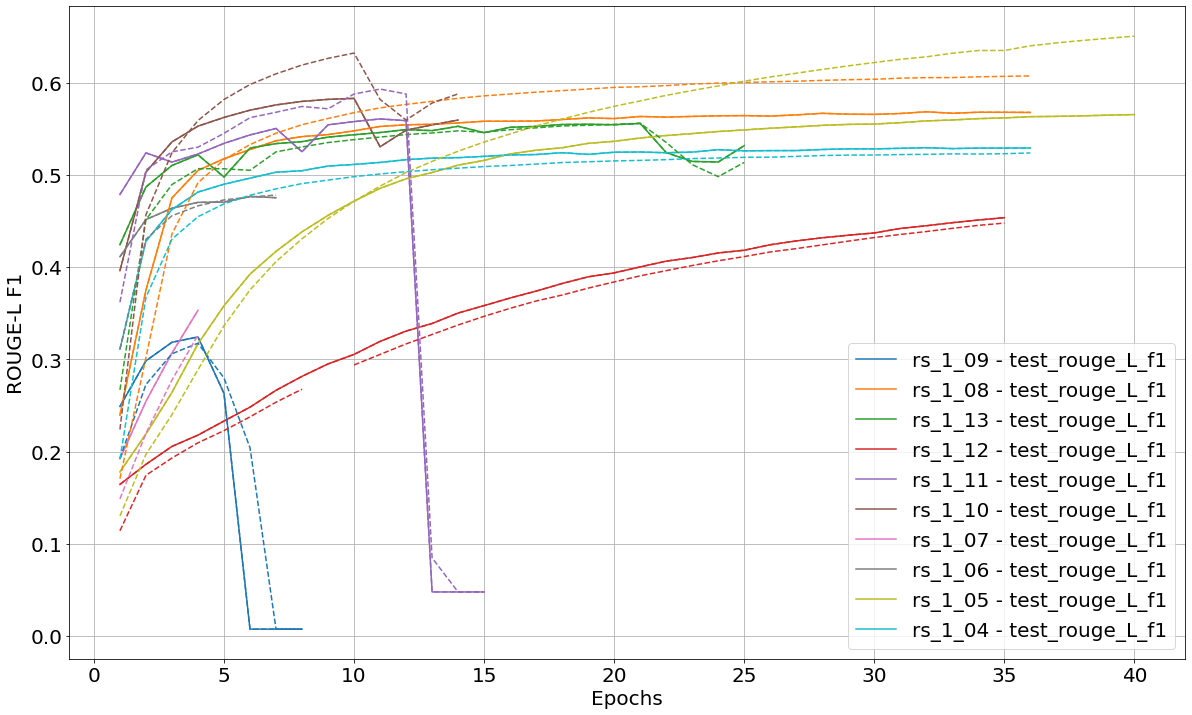

In [35]:
def plot_learning_curves(df, metrics=['test_rouge_L_f1', 'rouge_L_f1']):
    linestyles = ['solid', 'dashed']
    xs = df['epoch']
    labels = []
    
    for i, metric in enumerate(metrics):
        for column in df.columns:
            if metric in column:
                ys = df[column]
                plt.plot(xs, ys, linestyle=linestyles[i])
                
                if i == 0:
                    labels.append(column)

                    
    plt.xlabel('Epochs', fontsize=20)
    plt.xticks(fontsize=20)
    
    plt.ylabel('ROUGE-L F1', fontsize=20)
    plt.yticks(fontsize=20)

                
    plt.grid(True)
    plt.legend(labels=labels, fontsize=20, loc='lower right')
    
plot_learning_curves(df_plot)